In [1]:
import iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import iris.quickplot as qplt
import iris.plot as iplt
import datetime
import shutil
from six.moves import urllib
from pathlib import Path
import trackpy
from iris.time import PartialDateTime
import functions

import tobac #tobac package cloned from https://github.com/tobac-project/tobac.git

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)
warnings.filterwarnings('ignore', category=RuntimeWarning, append=True)
warnings.filterwarnings('ignore', category=FutureWarning, append=True)
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [2]:
Track_multi = pd.read_hdf('Save/cold_core/Track_240_170_low.h5','table')
Track_single = pd.read_hdf('Save/Jan_2005/singleTb/Track_240.h5', 'table')

In [3]:
print(np.unique(Track_multi.cell.values).shape[0], '  unique cloud cells in month Jan 2005 when using multithreshold. Features:', Track_multi.shape[0])
print(np.unique(Track_single.cell.values).shape[0], '  unique cloud cells in month Jan 2005 when using single threshold. Features:', Track_single.shape[0])


2   unique cloud cells in month Jan 2005 when using multithreshold. Features: 859
392   unique cloud cells in month Jan 2005 when using single threshold. Features: 9081


In [4]:
print(len(Track_multi['cell'].dropna().unique()))
print(len(Track_single['cell'].dropna().unique()))

2
392


In [5]:
Track_multi

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell
0,0,3,683.783509,672.445019,1673762,240,1,2005-01-01 00:30:00,2005-01-01 00:30:00,-12.346818,-57.805922,302.194078,302.194078,1,0 days 00:00:00
1,1,3,682.063623,673.062044,1683354,240,2,2005-01-01 01:30:00,2005-01-01 01:30:00,-12.416473,-57.780935,302.219065,302.219065,1,0 days 01:00:00
2,2,3,680.454574,674.059719,1692612,240,3,2005-01-01 02:30:00,2005-01-01 02:30:00,-12.481640,-57.740532,302.259468,302.259468,1,0 days 02:00:00
3,3,3,678.670430,675.502931,1694570,240,4,2005-01-01 03:30:00,2005-01-01 03:30:00,-12.553898,-57.682086,302.317914,302.317914,1,0 days 03:00:00
4,4,3,676.184119,677.627681,1699955,240,5,2005-01-01 04:30:00,2005-01-01 04:30:00,-12.654593,-57.596022,302.403978,302.403978,1,0 days 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,739,4,712.896637,603.545541,1596405,240,1169,2005-01-31 19:30:00,2005-01-31 19:30:00,-11.167737,-60.596346,299.403654,299.403654,1,30 days 19:00:00
1169,740,3,711.481042,600.949677,1594520,240,1170,2005-01-31 20:30:00,2005-01-31 20:30:00,-11.225068,-60.701501,299.298499,299.298499,1,30 days 20:00:00
1170,741,3,709.931744,599.095492,1593712,240,1171,2005-01-31 21:30:00,2005-01-31 21:30:00,-11.287816,-60.776589,299.223411,299.223411,1,30 days 21:00:00
1171,742,3,707.684162,598.550666,1593716,240,1172,2005-01-31 22:30:00,2005-01-31 22:30:00,-11.378842,-60.798653,299.201347,299.201347,1,30 days 22:00:00


In [6]:
subset = Track_multi[Track_multi.cell>=0]
subset

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell
0,0,3,683.783509,672.445019,1673762,240,1,2005-01-01 00:30:00,2005-01-01 00:30:00,-12.346818,-57.805922,302.194078,302.194078,1,0 days 00:00:00
1,1,3,682.063623,673.062044,1683354,240,2,2005-01-01 01:30:00,2005-01-01 01:30:00,-12.416473,-57.780935,302.219065,302.219065,1,0 days 01:00:00
2,2,3,680.454574,674.059719,1692612,240,3,2005-01-01 02:30:00,2005-01-01 02:30:00,-12.481640,-57.740532,302.259468,302.259468,1,0 days 02:00:00
3,3,3,678.670430,675.502931,1694570,240,4,2005-01-01 03:30:00,2005-01-01 03:30:00,-12.553898,-57.682086,302.317914,302.317914,1,0 days 03:00:00
4,4,3,676.184119,677.627681,1699955,240,5,2005-01-01 04:30:00,2005-01-01 04:30:00,-12.654593,-57.596022,302.403978,302.403978,1,0 days 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168,739,4,712.896637,603.545541,1596405,240,1169,2005-01-31 19:30:00,2005-01-31 19:30:00,-11.167737,-60.596346,299.403654,299.403654,1,30 days 19:00:00
1169,740,3,711.481042,600.949677,1594520,240,1170,2005-01-31 20:30:00,2005-01-31 20:30:00,-11.225068,-60.701501,299.298499,299.298499,1,30 days 20:00:00
1170,741,3,709.931744,599.095492,1593712,240,1171,2005-01-31 21:30:00,2005-01-31 21:30:00,-11.287816,-60.776589,299.223411,299.223411,1,30 days 21:00:00
1171,742,3,707.684162,598.550666,1593716,240,1172,2005-01-31 22:30:00,2005-01-31 22:30:00,-11.378842,-60.798653,299.201347,299.201347,1,30 days 22:00:00


In [7]:
subset[subset.threshold_value == 170]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell


In [8]:
#cold core filter (removing any tracks that don't contain an area of 200K at some point over their lifetime)

for i in (subset['cell'].unique()): #for each unique cell value (each MCS)
    print(i)
    temp_sub = subset[subset.cell == i] #take a subset of rows for each MCS (take all the data of each MCS at each timestep)
    threshold_array = np.array(temp_sub.threshold_value.values) #create an array of the threshold that MCS reaches at each timestep
    for value in threshold_array: # for each value in the threshold array,
        if 170 not in threshold_array: #if the array does not include 200,
            subset = subset.drop(subset[subset.cell == i].index, axis=0) #drop all the rows corresponsing to that MCS cell (remove the MCS over all its timesteps)
            print('removed cell {}'.format(i))

subset

1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed cell 1
removed 

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell


In [9]:
subset[subset.cell == 870]

,frame,idx,hdim_1,hdim_2,num,threshold_value,feature,time,timestr,latitude,longitude,forecast_reference_time,forecast_period,cell,time_cell


In [10]:
#print(len(subset['cell'].dropna().unique()))

print(np.unique(subset.cell.values).shape[0], '  unique cloud cells in month Jan 2005 when using 190K cold core filter. Features:', Track_multi.shape[0])


0   unique cloud cells in month Jan 2005 when using 190K cold core filter. Features: 1173


<Figure size 640x480 with 0 Axes>

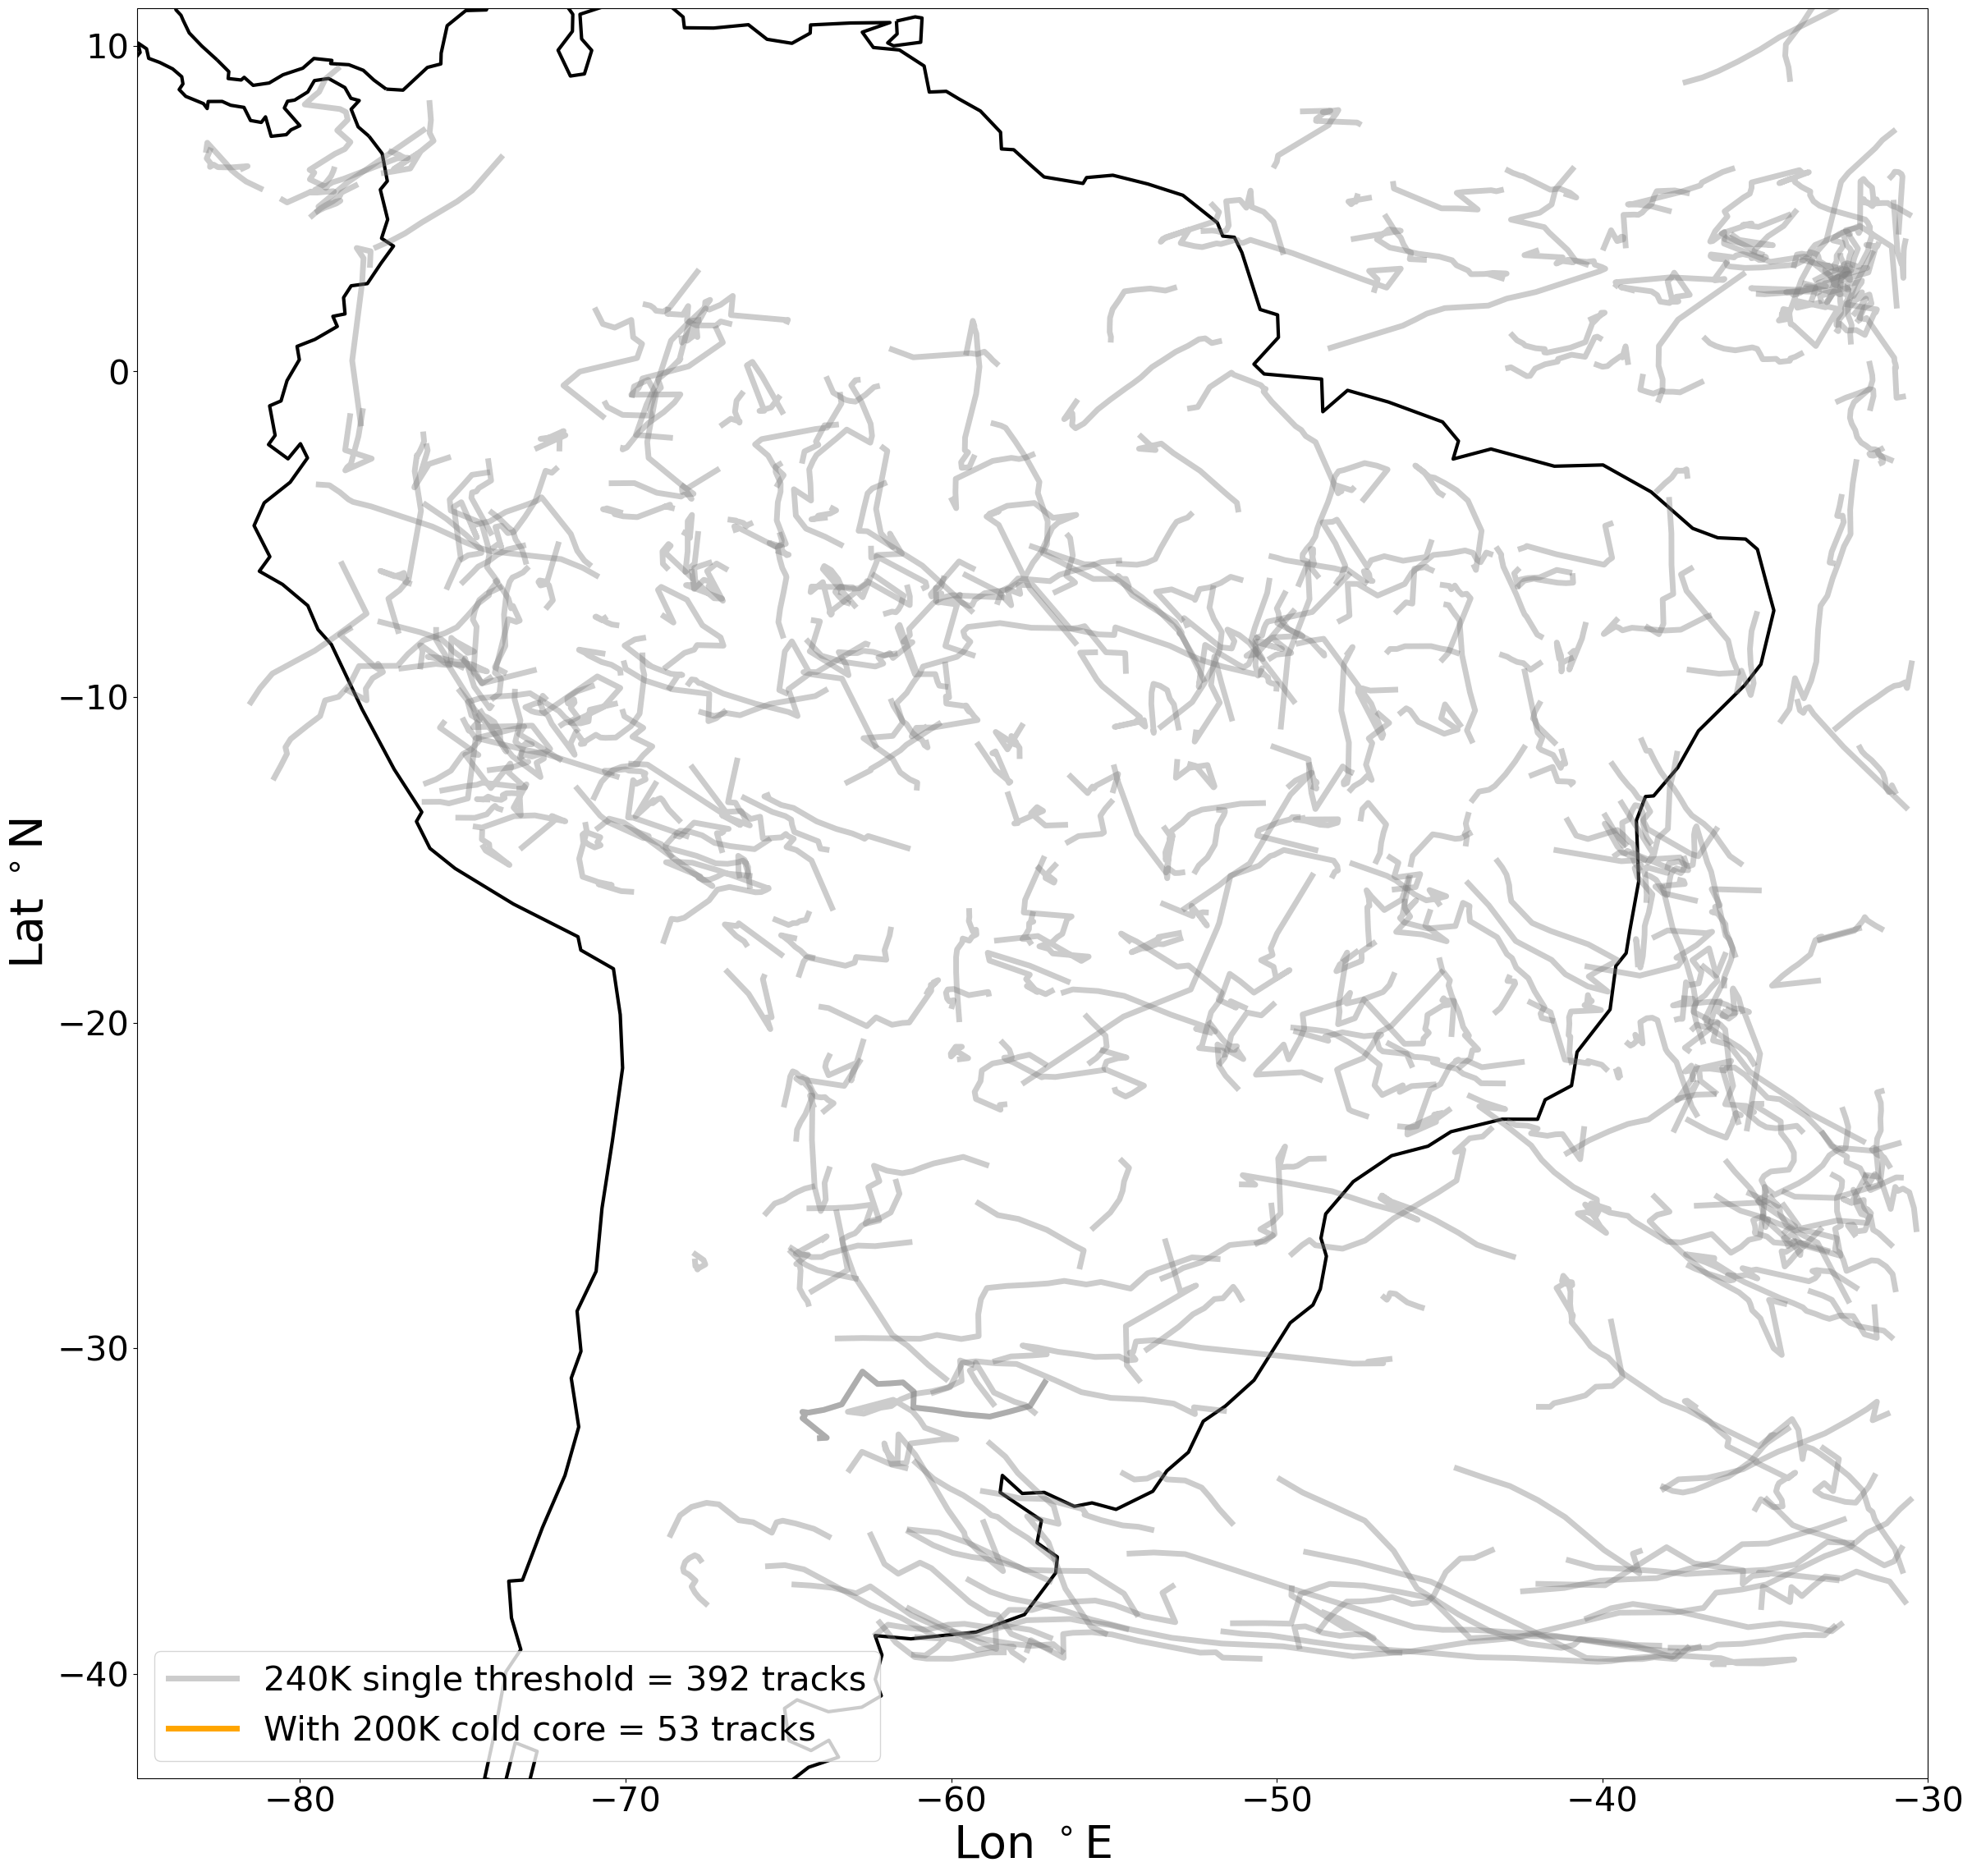

In [11]:
import cartopy.crs as ccrs
axis_extent=[-80,-30,-35,12]

#loop for each timestep:
plt.figure()

fig_map,ax_map=plt.subplots(figsize=(30,28),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map.set_extent([-85,-30,-40,10])
#tracks when no cold core filter: 
for cell in Track_single['cell'].dropna().unique():
    if cell == -1:
        continue
    Track_i_single_240 = Track_single[Track_single['cell'] == cell]
    plt.plot(Track_i_single_240['longitude'],Track_i_single_240['latitude'], '-',linewidth=5,color='grey',alpha=0.4)

#tracks when using 200K cold core filter
for cell in subset['cell'].dropna().unique():
    if cell == -1:
        continue
    Track_i_subset = subset[subset['cell'] == cell]
    plt.plot(Track_i_subset['longitude'],Track_i_subset['latitude'], '-',linewidth=5,color='orange')

#making legend labels for just 1 track in each filter:
cell_225 = 1
Track_single_240_1 = Track_single[Track_single['cell'] == cell_225]
plt.plot(Track_single_240_1['longitude'],Track_single_240_1['latitude'], '-', color='grey',alpha=0.4,label='240K single threshold = 392 tracks',linewidth=5)
Track_subset_1 = subset[subset['cell'] == cell_225]
plt.plot(Track_subset_1['longitude'],Track_subset_1['latitude'], '-', color='orange',label='With 200K cold core = 53 tracks',linewidth=5)

plt.xticks([-80,-70,-60,-50,-40,-30],fontsize=30)
plt.yticks([-40,-30,-20,-10,0,10],fontsize=30)
plt.gca().coastlines(linewidth=3)
plt.legend(loc='best',fontsize=30)
plt.xlabel('Lon $^\circ$E', fontsize=40)
plt.ylabel('Lat $^\circ$N', fontsize=40)

plt.savefig('Plot/cold_core/testing_Tb_filter_240_200.png')

In [12]:
tracks_225=pd.read_hdf('Save/cold_core/Track_coldcore_225.h5', 'table')
tracks_210=pd.read_hdf('Save/cold_core/Track_coldcore_210.h5', 'table')
tracks_200=pd.read_hdf('Save/cold_core/Track_coldcore_200.h5', 'table')
tracks_190=pd.read_hdf('Save/cold_core/Track_coldcore_190.h5', 'table')

In [13]:
dataframes= [tracks_225, tracks_210, tracks_200, tracks_190]

In [14]:
for df in dataframes:
    df.timestr = df.timestr.astype(str)
    df['datetime'] = pd.to_datetime(df.timestr.str.split(',\s*').str[0]) 
    set(df['datetime'])

In [15]:
#225
init_hours_225 = functions.get_mcs_init(tracks_225)
init_hours_225 = np.array(init_hours_225)
init_hours_225, bins = np.histogram(init_hours_225, bins = np.arange(0,25))

diss_hours_225 = functions.get_mcs_diss(tracks_225)
diss_hours_225 = np.array(diss_hours_225)
diss_hours_225, bins = np.histogram(diss_hours_225, bins = np.arange(0,25))

init_225 = init_hours_225/np.nansum(init_hours_225) * 100
diss_225 = diss_hours_225/np.nansum(diss_hours_225) * 100

#210
init_hours_210 = functions.get_mcs_init(tracks_210)
init_hours_210 = np.array(init_hours_210)
init_hours_210, bins = np.histogram(init_hours_210, bins = np.arange(0,25))

diss_hours_210 = functions.get_mcs_diss(tracks_210)
diss_hours_210 = np.array(diss_hours_210)
diss_hours_210, bins = np.histogram(diss_hours_210, bins = np.arange(0,25))

init_210 = init_hours_210/np.nansum(init_hours_210) * 100
diss_210 = diss_hours_210/np.nansum(diss_hours_210) * 100

#200
init_hours_200 = functions.get_mcs_init(tracks_200)
init_hours_200 = np.array(init_hours_200)
init_hours_200, bins = np.histogram(init_hours_200, bins = np.arange(0,25))

diss_hours_200 = functions.get_mcs_diss(tracks_200)
diss_hours_200 = np.array(diss_hours_200)
diss_hours_200, bins = np.histogram(diss_hours_200, bins = np.arange(0,25))

init_200 = init_hours_200/np.nansum(init_hours_200) * 100
diss_200 = diss_hours_200/np.nansum(diss_hours_200) * 100

#190
init_hours_190 = functions.get_mcs_init(tracks_190)
init_hours_190 = np.array(init_hours_190)
init_hours_190, bins = np.histogram(init_hours_190, bins = np.arange(0,25))

diss_hours_190 = functions.get_mcs_diss(tracks_190)
diss_hours_190 = np.array(diss_hours_190)
diss_hours_190, bins = np.histogram(diss_hours_190, bins = np.arange(0,25))

init_190 = init_hours_190/np.nansum(init_hours_190) * 100
diss_190 = diss_hours_190/np.nansum(diss_hours_190) * 100

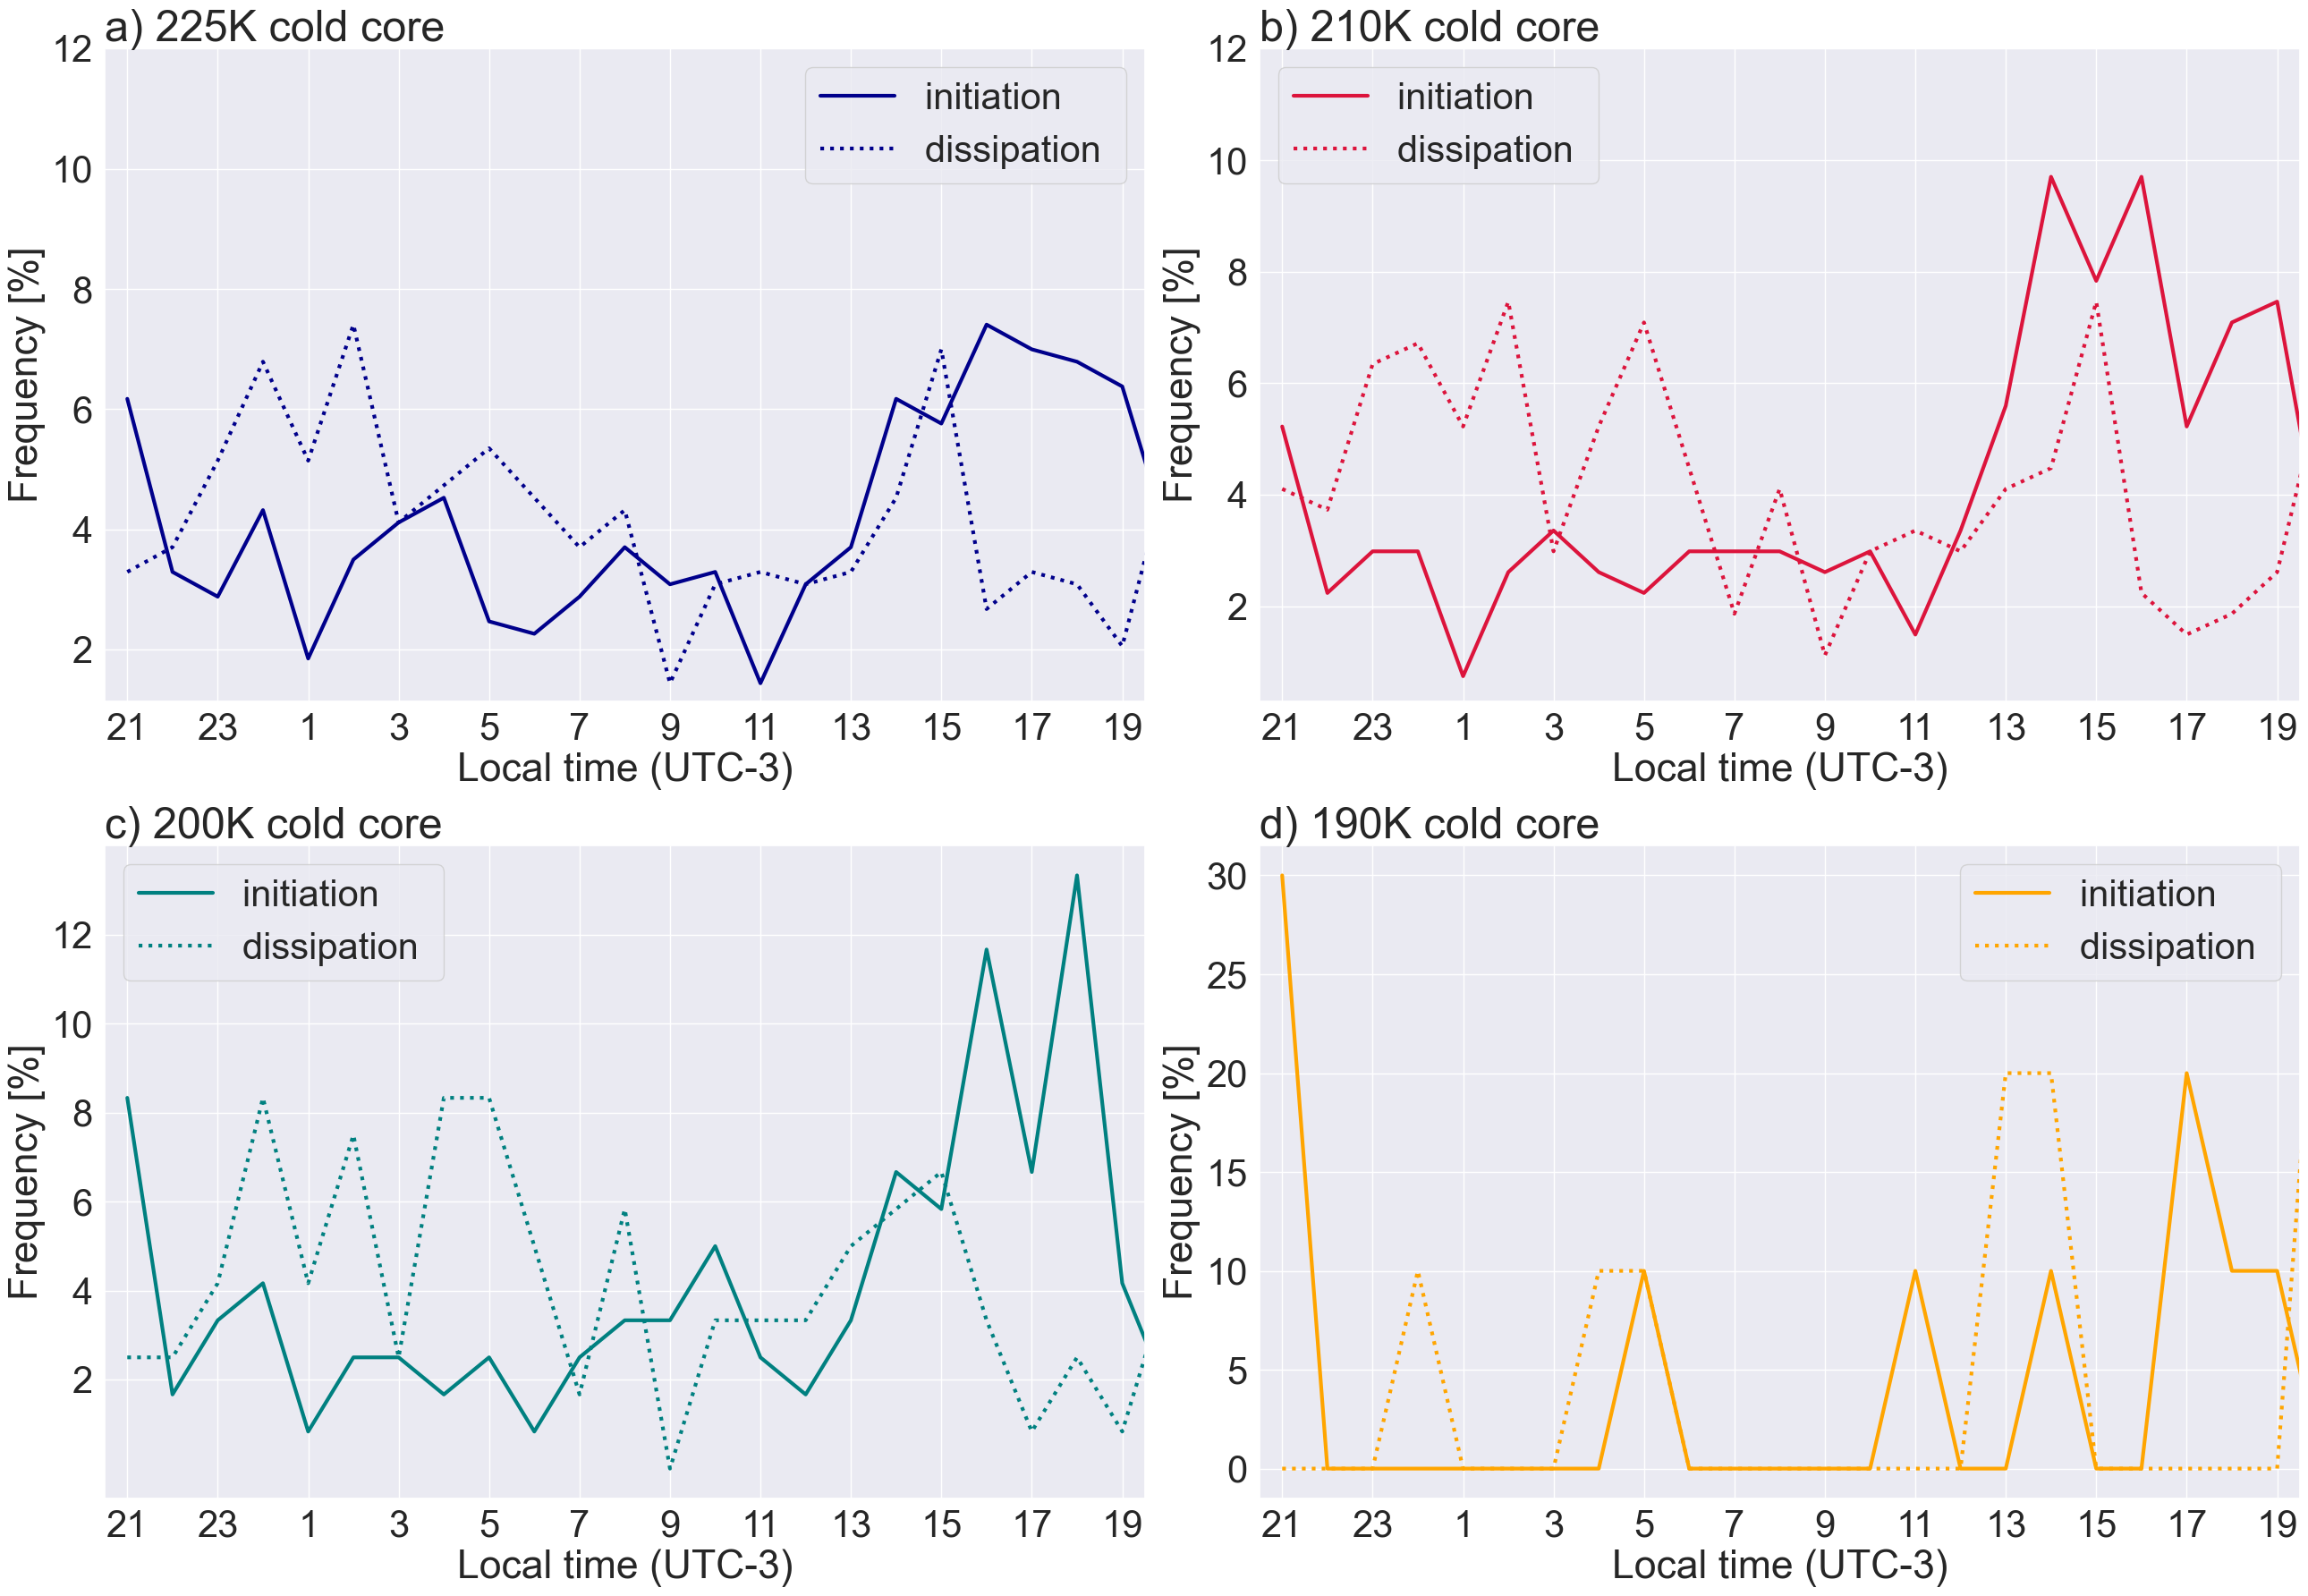

In [16]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set()

plt.figure(figsize=(26,18))
f= 30
lf= 30
l=32

ax1 = plt.subplot(2, 2, 1) 
ax1.set_title('a) 225K cold core ', loc='left', fontsize= 35 )
ax1.plot(np.arange(0,24), init_225, label = 'initiation ', color= 'darkblue', linewidth = 3)
ax1.plot(np.arange(0,24), diss_225, label = 'dissipation ', color= 'darkblue', linewidth = 3, linestyle = 'dotted')
ax1.legend(fontsize=lf)

a= np.arange(21,24,2)
b= np.arange(1,20,2)
localtime= np.append(a, b)

labels=localtime.astype(str)
ax1.set_yticks(np.arange(2,14,2))
ax1.set_xticks(np.arange(0,23)[::2])
ax1.set_yticklabels(ax1.get_yticks(),fontsize=f)
ax1.set_xticklabels(labels,fontsize= f)
ax1.set_xlim(-0.5,22.5)
ax1.set_xlabel('Local time (UTC-3)', fontsize= l)
ax1.set_ylabel('Frequency [%]', fontsize= l)

labels=localtime.astype(str)
ax2 = plt.subplot(2, 2, 2) 
ax2.set_title('b) 210K cold core ', loc='left', fontsize= 35 )
ax2.plot(np.arange(0,24), init_210, label = 'initiation ', color= 'crimson', linewidth = 3)
ax2.plot(np.arange(0,24), diss_210, label = 'dissipation ', color= 'crimson', linewidth = 3, linestyle = 'dotted')
ax2.legend(fontsize=lf)
ax2.set_yticks(np.arange(2,14,2))
ax2.set_xticks(np.arange(0,23)[::2])
ax2.set_xticklabels(labels,fontsize= f)
ax2.set_xlim(-0.5,22.5)
ax2.set_yticklabels(ax2.get_yticks(),fontsize=f)
ax2.set_xlabel('Local time (UTC-3)', fontsize= l)
ax2.set_ylabel('Frequency [%]', fontsize= l)

ax3 = plt.subplot(2, 2, 3) 
ax3.set_title('c) 200K cold core ', loc='left', fontsize= 35 )
ax3.plot(np.arange(0,24), init_200, label = 'initiation ', color= 'teal', linewidth = 3)
ax3.plot(np.arange(0,24), diss_200, label = 'dissipation ', color= 'teal', linewidth = 3, linestyle = 'dotted')
ax3.legend(fontsize=lf)
ax3.set_yticks(np.arange(2,14,2))
ax3.set_xticks(np.arange(0,23)[::2])
ax3.set_yticklabels(ax3.get_yticks(),fontsize=f)
ax3.set_xticklabels(labels,fontsize= f)
ax3.set_xlim(-0.5,22.5)
ax3.set_xlabel('Local time (UTC-3)', fontsize= l)
ax3.set_ylabel('Frequency [%]', fontsize= l)

ax4 = plt.subplot(2, 2, 4) 
ax4.set_title('d) 190K cold core ', loc='left', fontsize= 35 )
ax4.plot(np.arange(0,24), init_190, label = 'initiation ', color= 'orange', linewidth = 3)
ax4.plot(np.arange(0,24), diss_190, label = 'dissipation ', color= 'orange', linewidth = 3, linestyle = 'dotted')
ax4.legend(fontsize=lf)
ax4.set_yticks(np.arange(0,35,5))
ax4.set_xticks(np.arange(0,23)[::2])
ax4.set_yticklabels(ax4.get_yticks(),fontsize=f)
ax4.set_xticklabels(labels,fontsize= f)
ax4.set_xlim(-0.5,22.5)
ax4.set_xlabel('Local time (UTC-3)', fontsize= l)
ax4.set_ylabel('Frequency [%]', fontsize= l)

plt.tight_layout()

plt.savefig('Plot/cold_core/init_diss.png')



In [17]:
init_lats_225, init_lons_225, diss_lats_225, diss_lons_225 = functions.get_init(tracks_225)
init_lats_210, init_lons_210, diss_lats_210, diss_lons_210 = functions.get_init(tracks_210)
init_lats_200, init_lons_200, diss_lats_200, diss_lons_200 = functions.get_init(tracks_200)
init_lats_190, init_lons_190, diss_lats_190, diss_lons_190 = functions.get_init(tracks_190)




KeyboardInterrupt: 

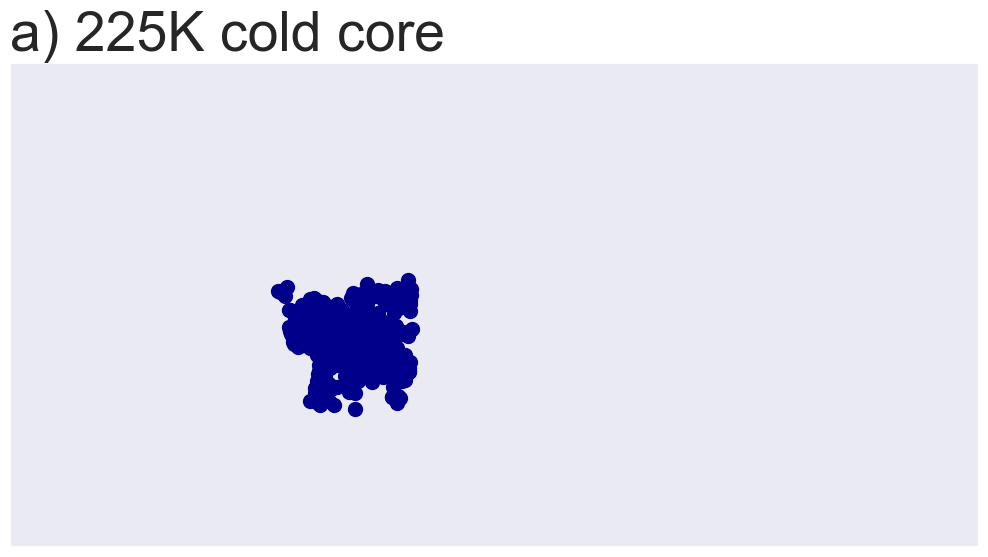

In [18]:
import cartopy.crs as ccrs

fig = plt.figure(figsize=(25,15))
xlabels=[-90,-70,-50,-30]
ylabels= [-40,-30,-20,-10,0,10]
# markersize 
s = 100
#fontsize
f=40

plt.subplots_adjust(wspace=0,hspace=0)
# Locations of initiation and dissipation of MCSs 
ax1 = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax1.set_title('a) 225K cold core', loc='left', fontsize= f )
ax1.scatter(init_lons_225, init_lats_225,  color='darkblue',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax1.scatter(diss_lons_225, diss_lats_225,  color='blue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax1.coastlines(linewidth=2)
ax1.legend(fontsize= 30)
ax1.set_xticks([-90,-80, -70, -60, -50, -40, -30])
ax1.set_yticks([-40,-30,-20,-10,0,10])
ax1.set_xticklabels(ax1.get_xticks().astype(int),fontsize=25)
ax1.set_yticklabels(ax1.get_yticks().astype(int),fontsize=25)
ax1.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax1.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax2 = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax2.set_title('b) 210K cold core ', loc='left', fontsize= f )
ax2.scatter(init_lons_210, init_lats_210,  color='crimson',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax2.scatter(diss_lons_210, diss_lats_210,  color='pink',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax2.coastlines(linewidth=2)
ax2.legend(fontsize= 30)
ax2.set_xticks([-90,-80, -70, -60, -50, -40, -30])
ax2.set_yticks([-40,-30,-20,-10,0,10])
ax2.set_xticklabels(ax2.get_xticks().astype(int),fontsize=25)
ax2.set_yticklabels(ax2.get_yticks().astype(int),fontsize=25)
ax2.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax2.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax3 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax3.set_title('c) 200K cold core ', loc='left', fontsize= f )
ax3.scatter(init_lons_200, init_lats_200,  color='teal',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax3.scatter(diss_lons_200, diss_lats_200,  color='skyblue',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax3.coastlines(linewidth=2)
ax3.legend(fontsize= 30)
ax3.set_xticks([-90,-80, -70, -60, -50, -40, -30])
ax3.set_yticks([-40,-30,-20,-10,0,10])
ax3.set_xticklabels(ax3.get_xticks().astype(int),fontsize=25)
ax3.set_yticklabels(ax3.get_yticks().astype(int),fontsize=25)
ax3.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax3.set_ylabel('Lat $^\circ$N',  fontsize=30)

ax4 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax4.set_title('d) 190K cold core ', loc='left', fontsize= f )
ax4.scatter(init_lons_190, init_lats_190,  color='orange',marker='o', s = s, transform=ccrs.PlateCarree(),label= 'initiation')
ax4.scatter(diss_lons_190, diss_lats_190,  color='gold',marker='o', s = s/2, transform=ccrs.PlateCarree(),label= 'dissipation')
ax4.legend(fontsize= 30)
ax4.coastlines(linewidth=2)
ax4.set_xticks([-90,-80, -70, -60, -50, -40, -30])
ax4.set_yticks([-40,-30,-20,-10,0,10])
ax4.set_xticklabels(ax4.get_xticks().astype(int),fontsize=25)
ax4.set_yticklabels(ax4.get_yticks().astype(int),fontsize=25)
ax4.set_xlabel('Lon $^\circ$E',  fontsize=30)
ax4.set_ylabel('Lat $^\circ$N',  fontsize=30)


fig.tight_layout()

plt.savefig('Plot/cold_core/init_diss_loc.png')


In [ ]:
area_225=functions.get_area(tracks_225)
area_210=functions.get_area(tracks_210)
area_200=functions.get_area(tracks_200)
area_190=functions.get_area(tracks_190)

KeyboardInterrupt: 

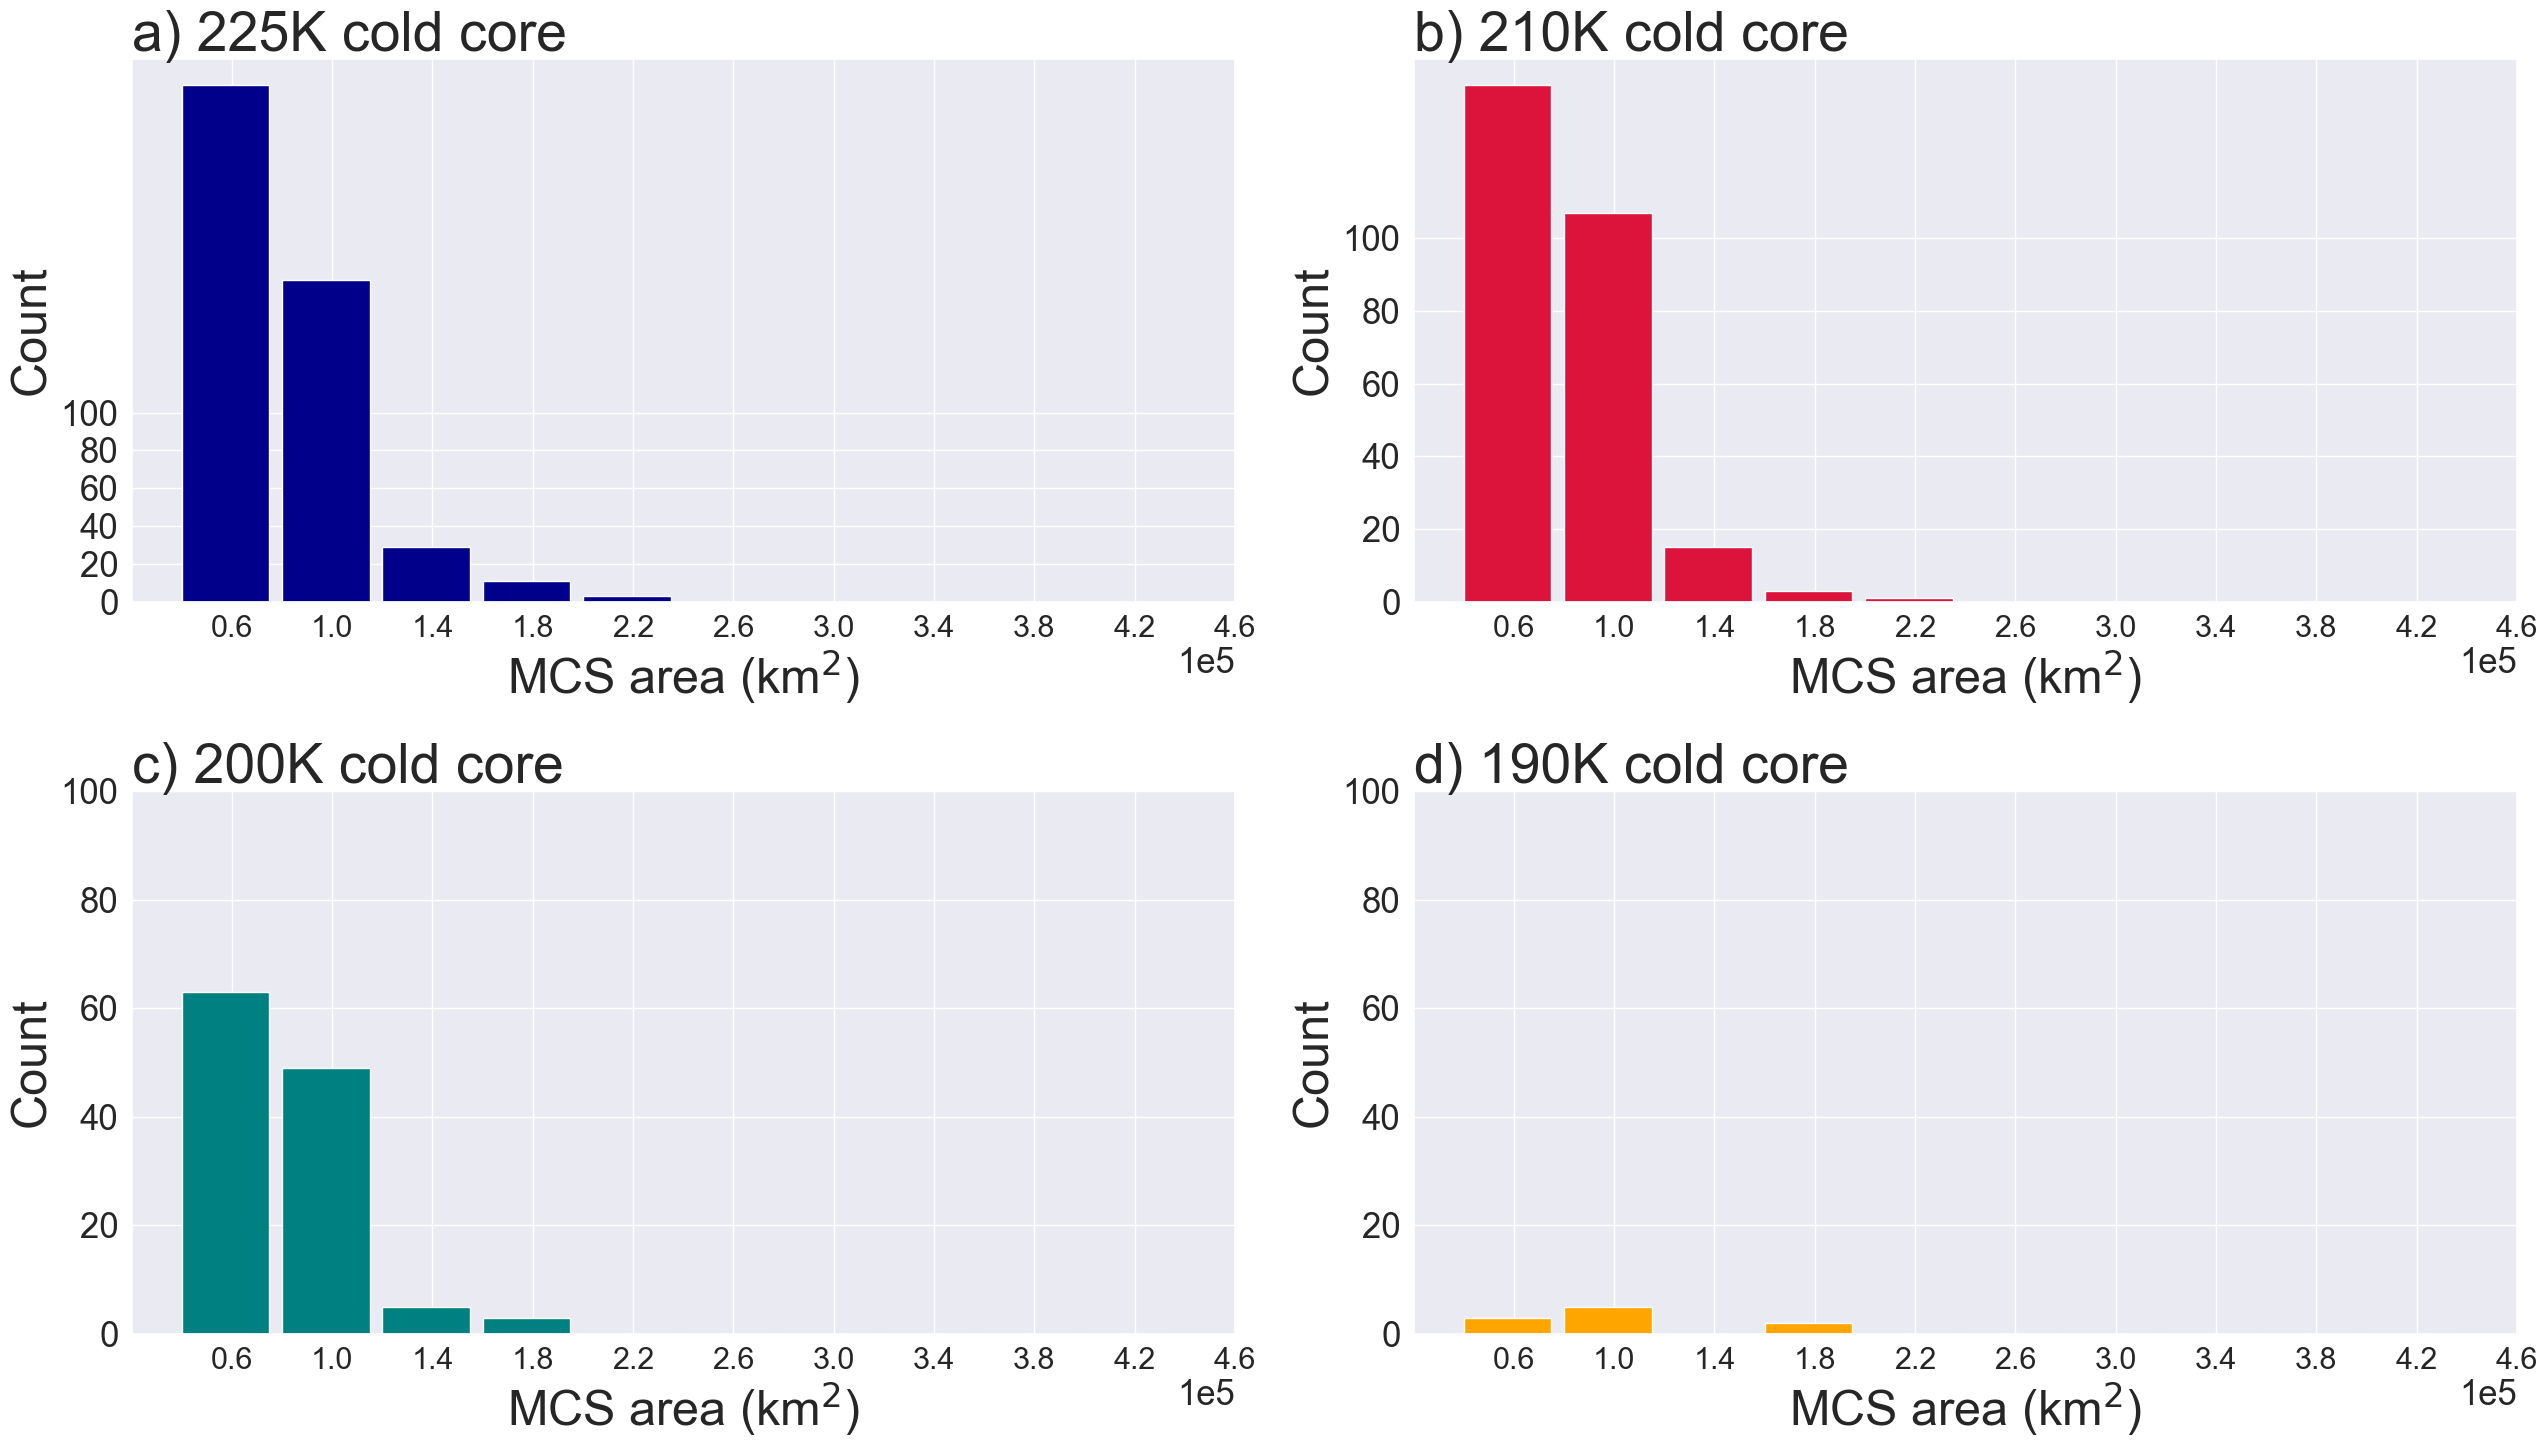

In [ ]:
#plot of initiation time of MCSs 
import seaborn as sns 
sns.set(font_scale=2)

fig = plt.figure(figsize=(26,15))
t = 40
f= 35
n = 25
lf= 15


ax1=plt.subplot(2,2,1)
ax1.set_title('a) 225K cold core', loc='left', fontsize= t )
ax1.hist(area_225,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'darkblue',align='mid')
ax1.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax1.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax1.set_yticks([0,20,40,60,80,100])
ax1.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax1.xaxis.get_offset_text().set_fontsize(25)
ax1.set_ylabel('Count',fontsize=f)

ax2=plt.subplot(2,2,2)
ax2.set_title('b) 210K cold core', loc='left', fontsize= t )
ax2.hist(area_210,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'crimson',align='mid')
ax2.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax2.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax2.set_yticks([0,20,40,60,80,100])
ax2.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax2.xaxis.get_offset_text().set_fontsize(25)
ax2.set_ylabel('Count',fontsize=f)

ax3=plt.subplot(2,2,3)
ax3.set_title('c) 200K cold core ', loc='left', fontsize= t)
ax3.hist(area_200,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'teal',align='mid')
ax3.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax3.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax3.set_yticks([0,20,40,60,80,100])
ax3.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax3.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax3.xaxis.get_offset_text().set_fontsize(25)
ax3.set_ylabel('Count',fontsize=f)

ax4=plt.subplot(2,2,4)
ax4.set_title('d) 190K cold core ', loc='left', fontsize= t )
ax4.hist(area_190,bins=[40000,80000,120000,160000,200000,240000,280000,320000,360000,400000,440000],width=35000,color= 'orange',align='mid')
ax4.set_xlabel('MCS area (km$^{2}$)', fontsize= f)
ax4.set_xticks([60000,100000,140000,180000,220000,260000,300000,340000,380000,420000,460000])
ax4.set_yticks([0,20,40,60,80,100])
ax4.set_yticklabels(ax1.get_yticks(),fontsize=n)
ax4.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax4.xaxis.get_offset_text().set_fontsize(25)
ax4.set_ylabel('Count',fontsize=f)

fig.tight_layout()
plt.savefig('Plot/cold_core/area.png')


*comparing the feature points when using a 200K cold core with the masks/tracks of single 240K tb threshold*

NameError: name 'Track_single_240' is not defined

<Figure size 640x480 with 0 Axes>

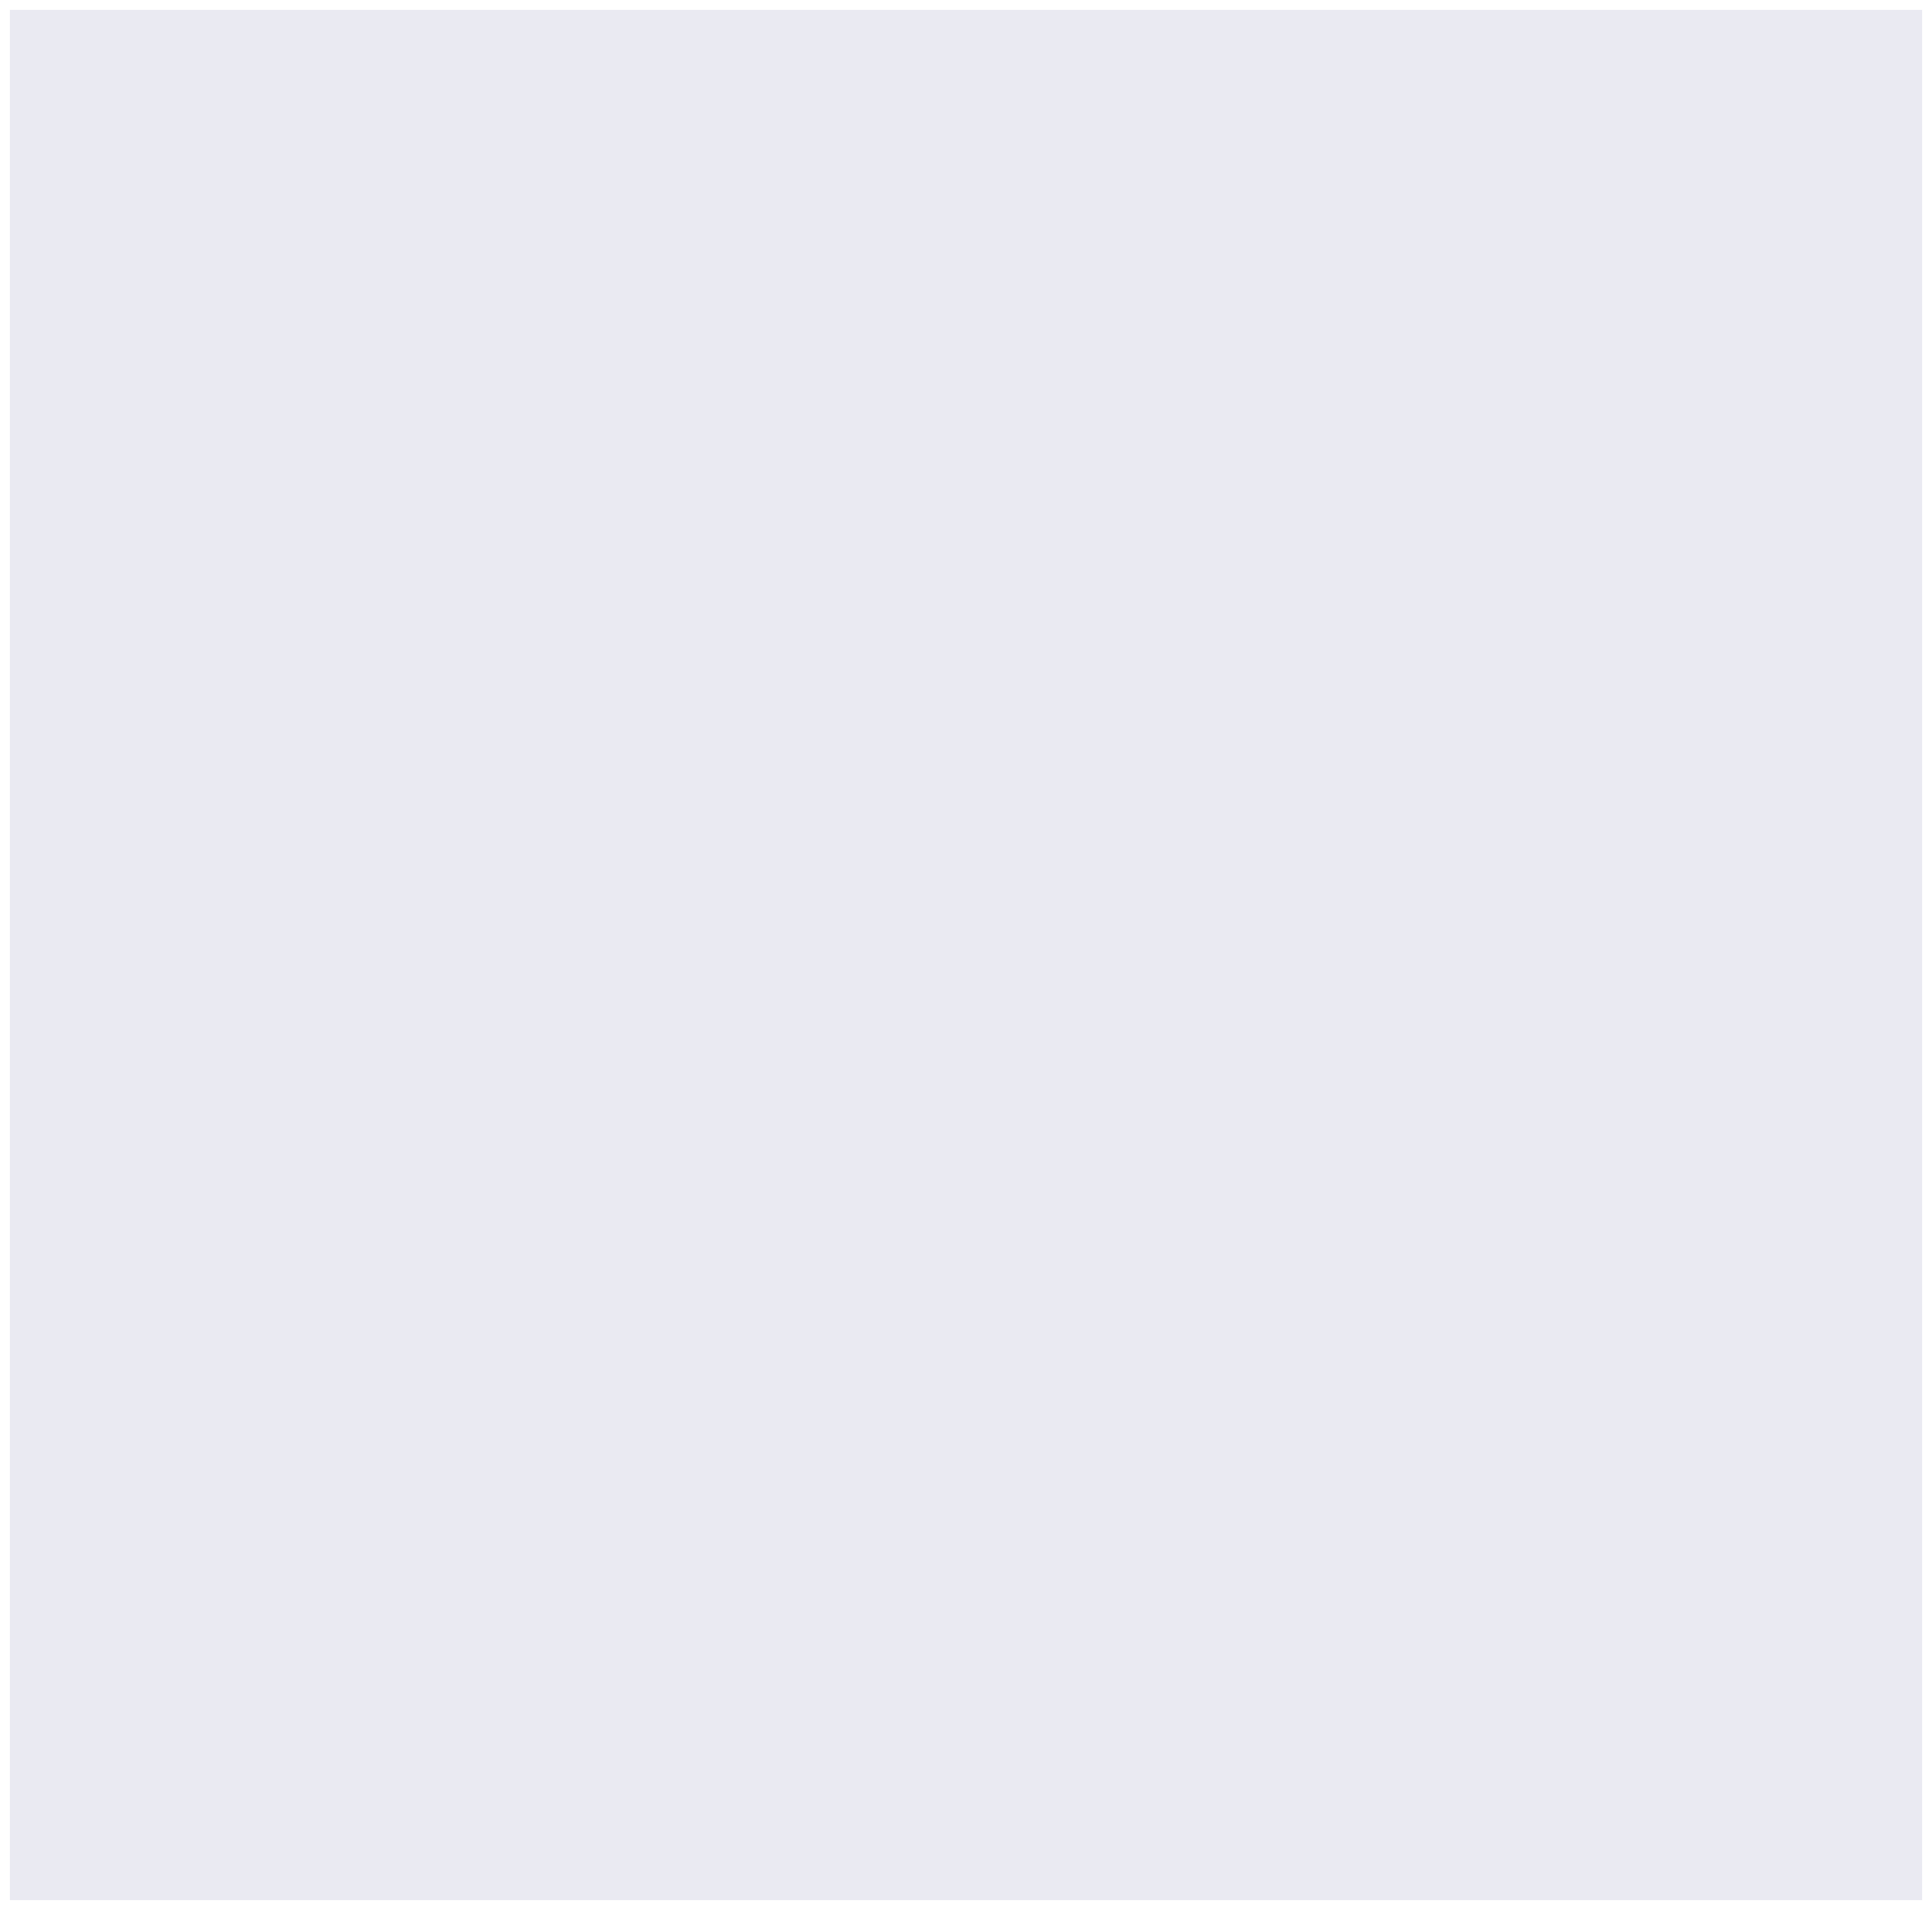

In [ ]:
import cartopy.crs as ccrs
axis_extent=[-80,-30,-35,12]

#loop for each timestep:
plt.figure()

fig_map,ax_map=plt.subplots(figsize=(30,28),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map.set_extent([-85,-30,-40,10])
#tracks when using 225K cold core filter
for cell in Track_single_240['cell'].dropna().unique():
    if cell == -1:
        continue
    Track_i_single_240 = Track_single_240[Track_single_240['cell'] == cell]
    plt.plot(Track_i_single_240['longitude'],Track_i_single_240['latitude'], '-',linewidth=5,color='purple',alpha=0.4)


plt.scatter(x=subset_2['longitude'],y=subset_2['latitude'],c='k',marker='x',s=200,linewidth=4,zorder=5)


for cell in subset_2['cell'].dropna().unique():
    if cell == -1:
        continue
    Track_i_subset_2 = subset_2[subset_2['cell'] == cell]
    plt.plot(Track_i_subset_2['longitude'],Track_i_subset_2['latitude'], '-',linewidth=5,color='teal')


#making legend labels for just 1 track in each filter:
cell_225 = 30
Track_single_240_1 = Track_single_240[Track_single_240['cell'] == cell_225]
plt.plot(Track_single_240_1['longitude'],Track_single_240_1['latitude'], '-', color='purple',alpha=0.4,label='240K single threshold = 392 tracks',linewidth=5)


plt.xticks([-80,-70,-60,-50,-40,-30],fontsize=30)
plt.yticks([-40,-30,-20,-10,0,10],fontsize=30)
plt.gca().coastlines(linewidth=3)
plt.legend(loc='best',fontsize=30)
plt.xlabel('Lon $^\circ$E', fontsize=40)
plt.ylabel('Lat $^\circ$N', fontsize=40)


In [ ]:
print(len(Track_single_240['cell'].unique()))

NameError: name 'Track_single_240' is not defined